In [1]:
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/mobile-price/mobilepricedata.csv


In [2]:
import pandas as pd
df = pd.read_csv('/kaggle/input/mobile-price/mobilepricedata.csv')

In [3]:
df.head(5)

,Name,Brand_Name,Processor,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price,Price_Range
0,"Redmi Note 4 (Black, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
1,"Redmi Note 4 (Dark Grey, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
2,"Redmi Note 4 (Gold, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
3,"Redmi Note 4 (Lake Blue, 64 GB)",Redmi,Snapdragon,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749,1
4,"Redmi 5A (Blue, 16 GB)",Redmi,Snapdragon,10,5,4.5,1232827.0,151035.0,2,16,5.0,13.0,5.0,3000,5999,0


In [4]:
df.shape

(2190, 16)

In [5]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt

In [6]:
x =df.drop(['Name','Brand_Name','Processor','Price_Range'],axis = 1)
y = df.Price_Range 
x.head(5)

,BrandCategory,ProcessorCategory,Rating,Numbe_of_Ratings,Number_of_Reviews,RAM,ROM,Diplay_Size,Back_Camera,Front_Camera,Battery,Price
0,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
1,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
2,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
3,10,5,4.4,1341712.0,211542.0,4,64,5.5,13.0,5.0,4100,12749
4,10,5,4.5,1232827.0,151035.0,2,16,5.0,13.0,5.0,3000,5999


In [7]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2190 entries, 0 to 2189
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   BrandCategory      2190 non-null   int64  
 1   ProcessorCategory  2190 non-null   int64  
 2   Rating             2190 non-null   float64
 3   Numbe_of_Ratings   2190 non-null   float64
 4   Number_of_Reviews  2190 non-null   float64
 5   RAM                2190 non-null   int64  
 6   ROM                2190 non-null   int64  
 7   Diplay_Size        2190 non-null   float64
 8   Back_Camera        2190 non-null   float64
 9   Front_Camera       2190 non-null   float64
 10  Battery            2190 non-null   int64  
 11  Price              2190 non-null   int64  
dtypes: float64(6), int64(6)
memory usage: 205.4 KB


In [8]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
best_feature = SelectKBest(score_func = chi2,k = 10)
fit = best_feature.fit(x,y)
dfscore = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(x.columns)
feature_score = pd.concat([dfcolumns,dfscore],axis = 1)
feature_score.columns = ['Feature','Score']
feature_score

,Feature,Score
0,BrandCategory,1.321370e+03
1,ProcessorCategory,7.094298e+02
2,Rating,4.753255e+00
3,Numbe_of_Ratings,3.800263e+07
4,Number_of_Reviews,4.659646e+06
5,RAM,1.033132e+03
6,ROM,1.240175e+05
7,Diplay_Size,4.435054e+00
8,Back_Camera,1.207669e+04
9,Front_Camera,2.280727e+03


<AxesSubplot:>

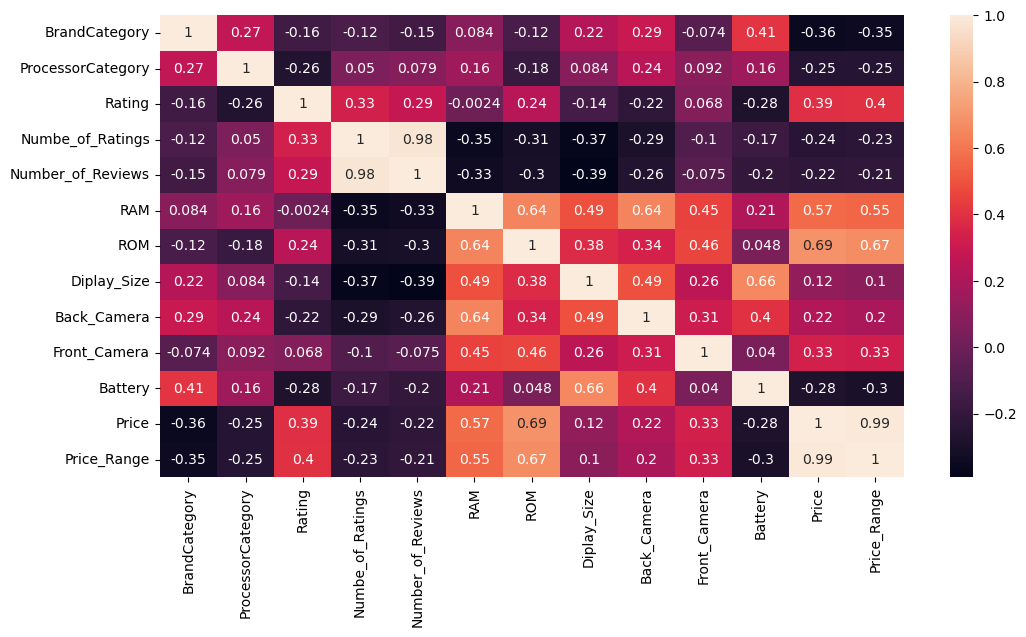

In [9]:
plt.figure(figsize = (12,6))
sns.heatmap(df.corr(method = 'spearman'),annot = True)

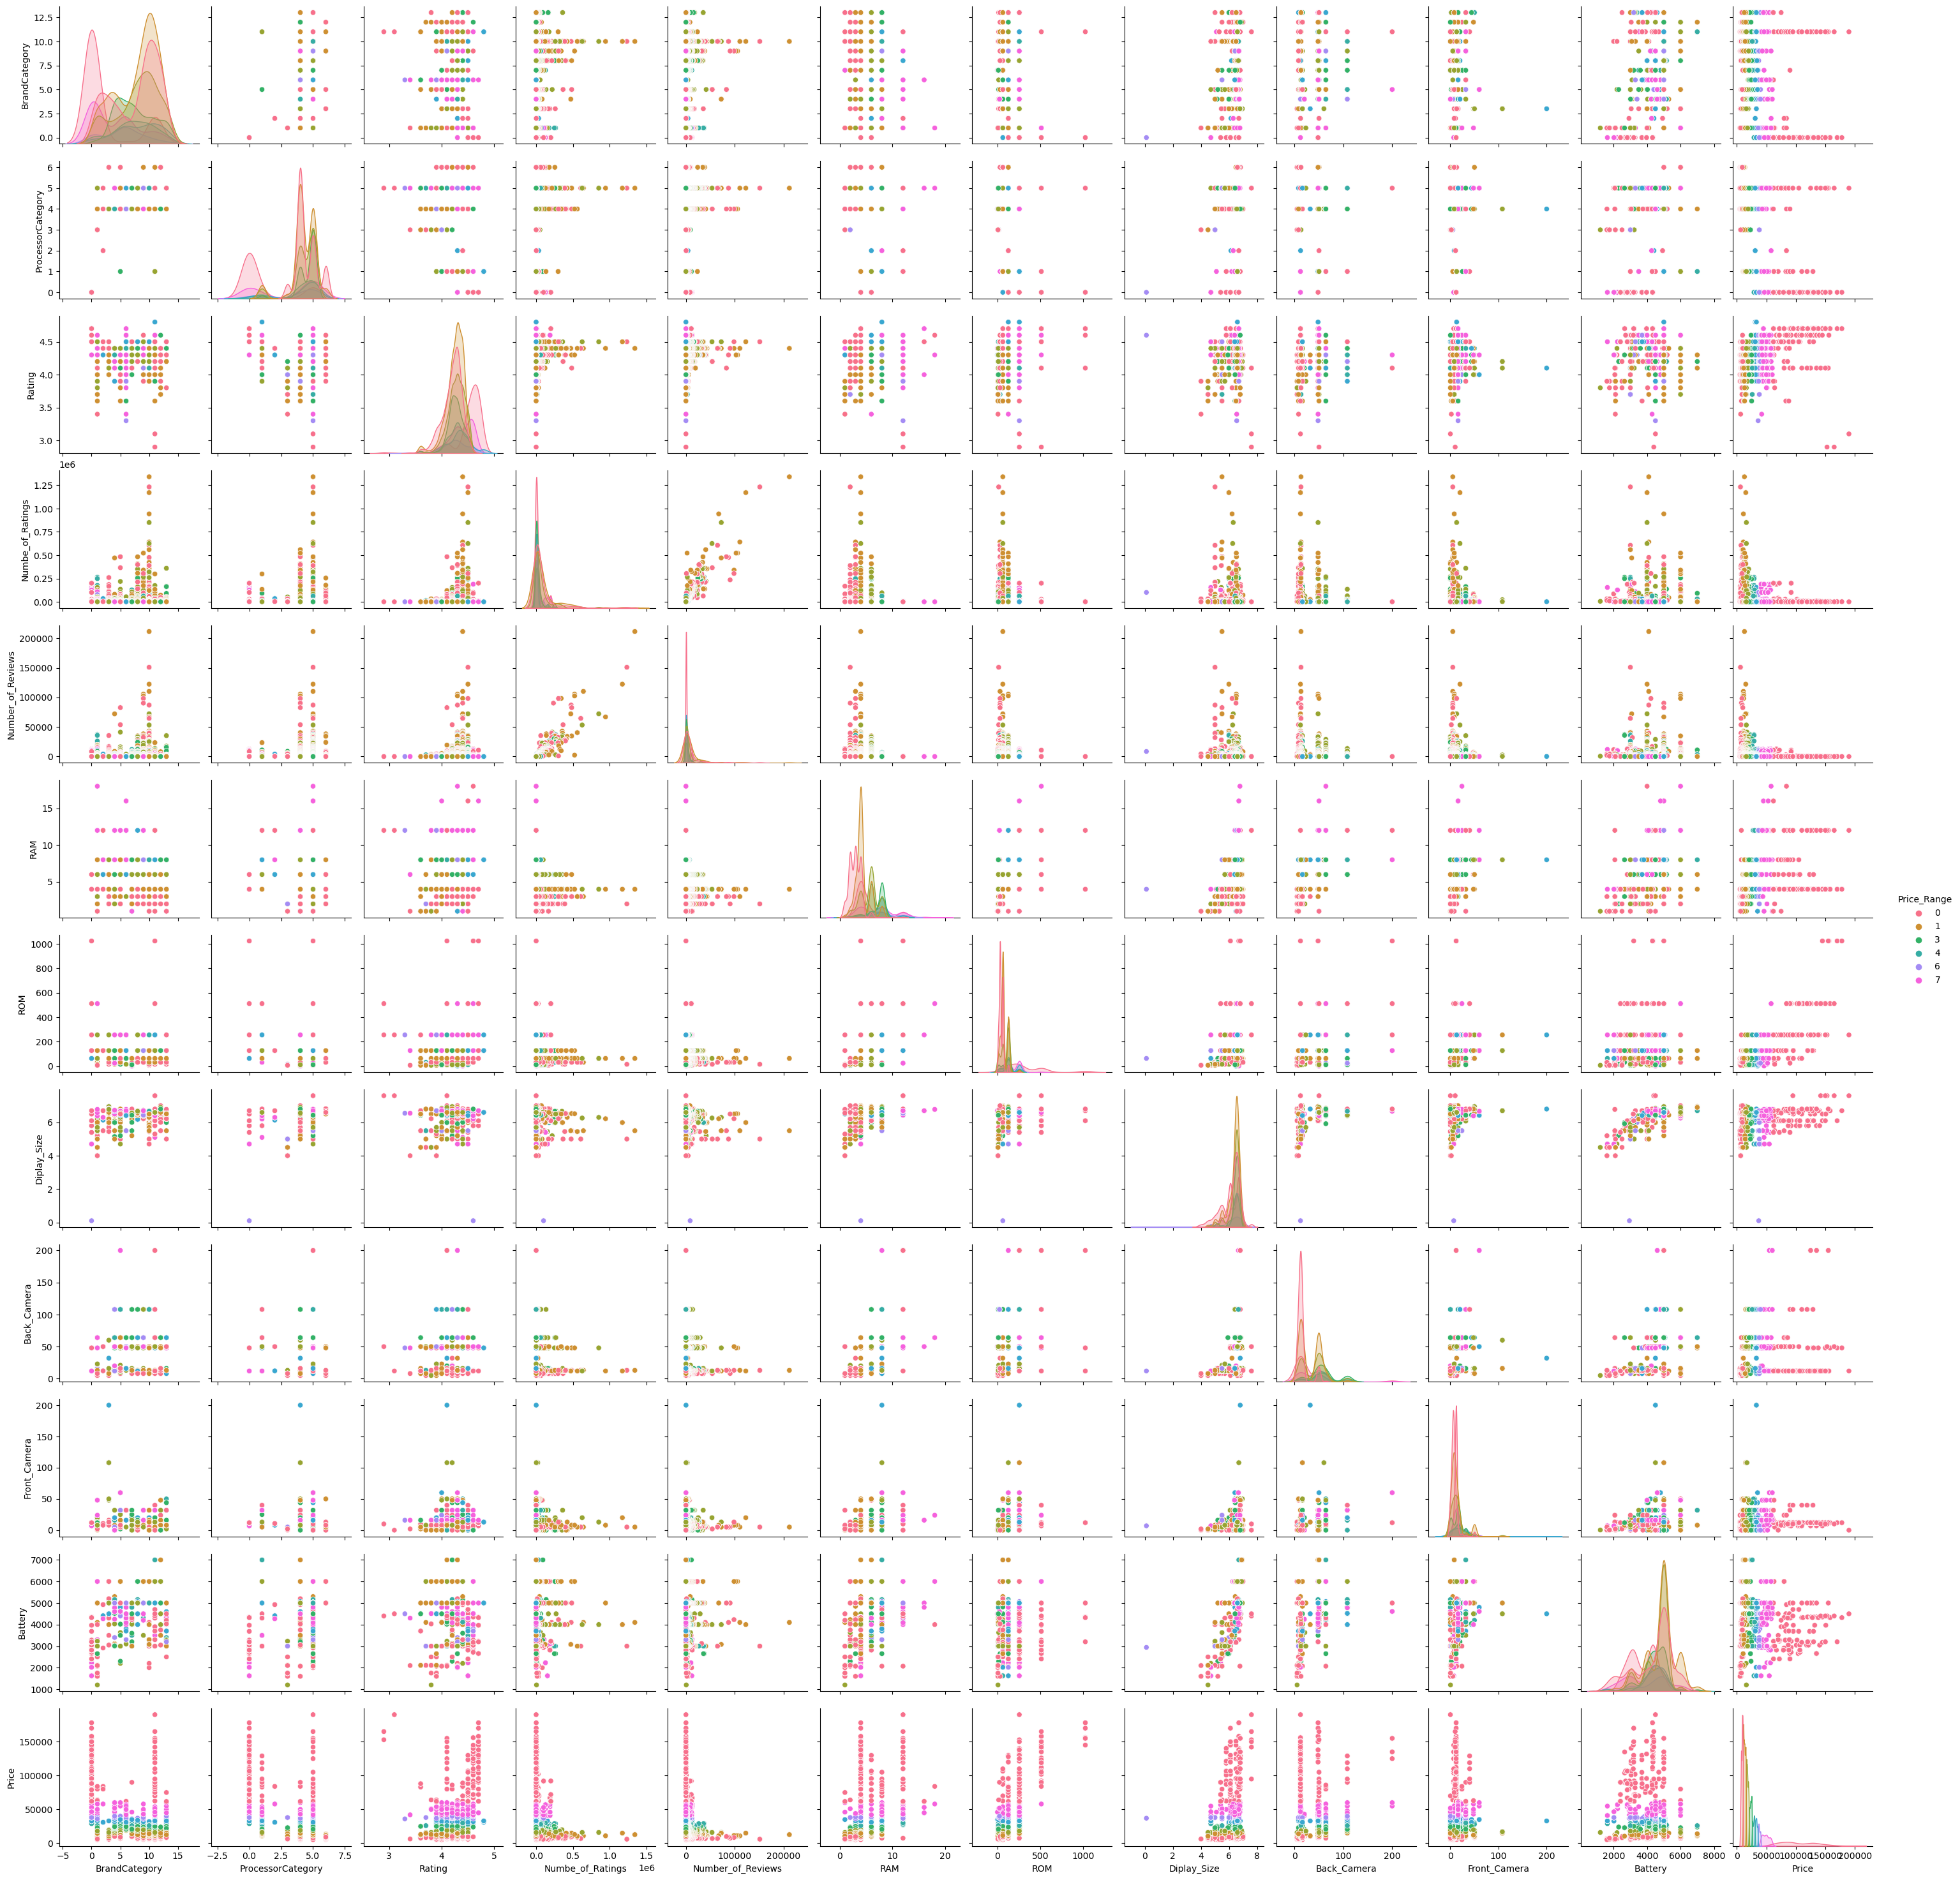

In [10]:
sns.pairplot(df,hue = 'Price_Range',palette = "husl")

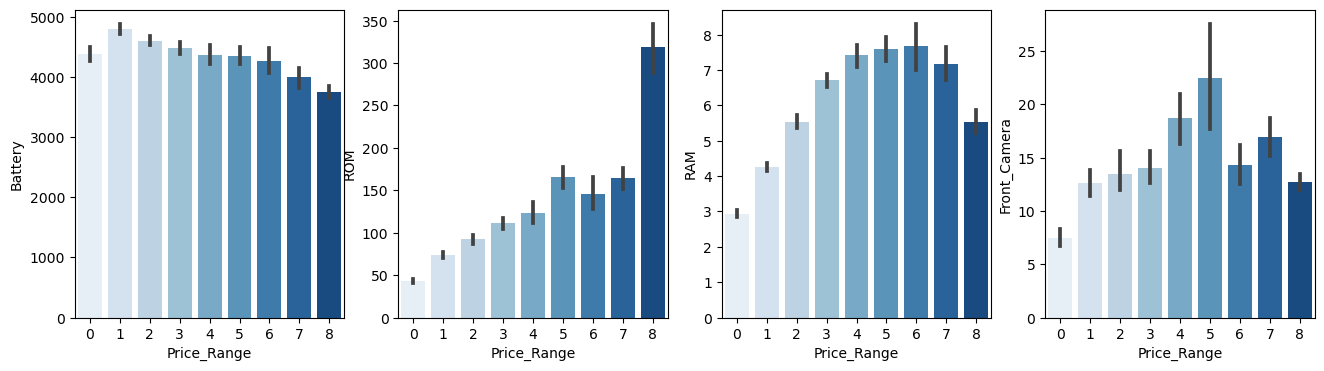

In [11]:
plt.figure(figsize = (16,4))
plt.subplot(1,4,1)
sns.barplot(x = 'Price_Range', y = 'Battery', data = df, palette = 'Blues')
plt.subplot(1,4,2)
sns.barplot(x = 'Price_Range', y = 'ROM',data = df, palette = 'Blues')
plt.subplot(1,4,3)
sns.barplot(x = 'Price_Range', y = 'RAM',data = df, palette = 'Blues')
plt.subplot(1,4,4)
sns.barplot(x = 'Price_Range', y = 'Front_Camera', data = df, palette = 'Blues')
plt.show()

In [12]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.2)
print(x_train.shape)
print(y_train.shape)

(1752, 12)
(1752,)


In [13]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=9)

In [14]:
y_pred_knn = knn.predict(x_test)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_knn)

0.8698630136986302

In [15]:
cm = confusion_matrix(y_test, y_pred_knn)
print(cm)

[[75  6  0  0  0  0  0  0  0]
 [12 90  4  0  0  0  0  0  0]
 [ 0 11 60  0  0  0  0  0  0]
 [ 0  0  4 29  0  0  0  0  0]
 [ 0  0  0  5 18  2  0  0  0]
 [ 0  0  0  0  2 17  0  0  0]
 [ 0  0  0  0  0  1 19  0  0]
 [ 0  0  0  0  0  1  4 22  0]
 [ 0  0  0  0  0  0  0  5 51]]


<AxesSubplot:>

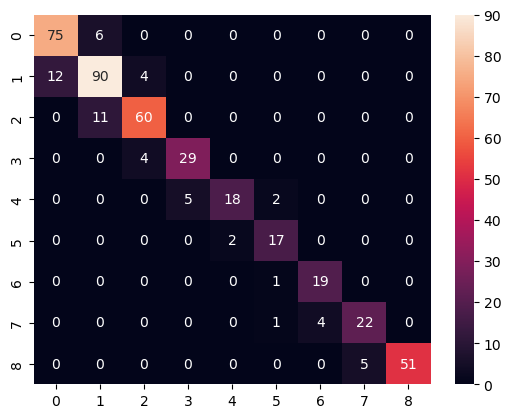

In [16]:
sns.heatmap(cm,annot = True, fmt = 'g')

In [17]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
#pca=PCA(0.9)
pca.fit(x_train)
x_pca = pca.transform(x_train)
explained_variance = pca.explained_variance_ratio_
explained_variance

array([0.94976346, 0.04813515])

<Figure size 800x600 with 0 Axes>

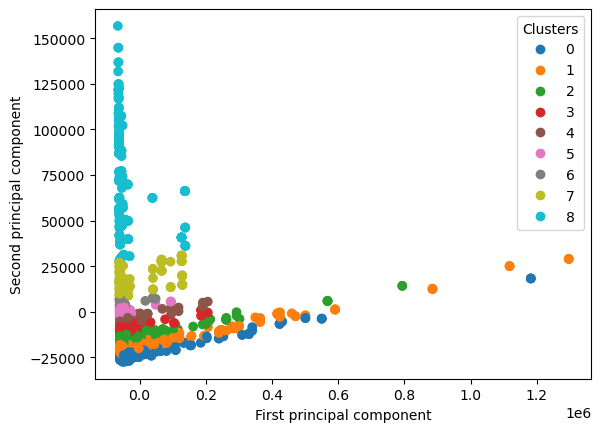

In [18]:

from matplotlib import offsetbox
from sklearn import (manifold, datasets)

plt.figure(figsize = (8,6))
fig, ax = plt.subplots()
sc = plt.scatter(x_pca[:,0],x_pca[:,1],c = y_train, cmap = 'tab10')
plt.xlabel('First principal component')
plt.ylabel('Second principal component')
ax.legend(*sc.legend_elements(), title = 'Clusters')


In [19]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_pca, y_train)

KNeighborsClassifier(n_neighbors=9)

In [20]:
x_test_pca = pca.transform(x_test)
y_pred_pca = knn.predict(x_test_pca)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_pca)

0.8721461187214612

In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_pca)
print(cm)

[[70 10  1  0  0  0  0  0  0]
 [ 7 96  3  0  0  0  0  0  0]
 [ 0 11 60  0  0  0  0  0  0]
 [ 0  0  4 29  0  0  0  0  0]
 [ 0  0  0  5 18  2  0  0  0]
 [ 0  0  0  0  2 17  0  0  0]
 [ 0  0  0  0  0  1 19  0  0]
 [ 0  0  0  0  0  1  4 22  0]
 [ 0  0  0  0  0  0  0  5 51]]


<AxesSubplot:>

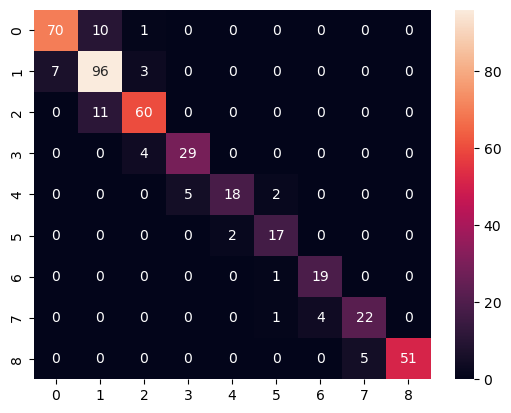

In [22]:
sns.heatmap(cm, annot = True, fmt = 'g')

In [23]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components = 2)
x_lda = lda.fit_transform(x_train,y_train)
x_test_lda = lda.transform(x_test)

In [24]:
explained_variance = lda.explained_variance_ratio_
explained_variance

array([0.90107483, 0.083558  ])

In [25]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 9)
knn.fit(x_lda, y_train)

KNeighborsClassifier(n_neighbors=9)

In [26]:
y_pred_lda = knn.predict(x_test_lda)
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred_lda)

0.7191780821917808

<AxesSubplot:>

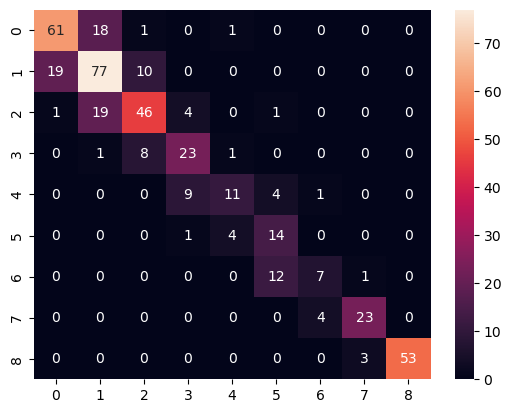

In [27]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred_lda)
sns.heatmap(cm,annot = True,fmt = 'g')

In case of uniform distributed data,LDA almost always performs better than PCA.However if the data is highly skewed(irregularly distributed)then it is advised to use PCA since LDA can be biased towards the majority the majority class.
When the within-class variance is much larger than the between-class variance: In this case, LDA may result in poor class separation and PCA may give better results by capturing the most important variations in the data.